In [1]:
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette2 = palettable.colorbrewer.diverging.RdYlGn_4_r
palette1 = palettable.lightbartlein.diverging.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap1 = palette1.mpl_colormap
cmap2 = palette2.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


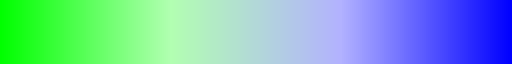

In [4]:
cmap1

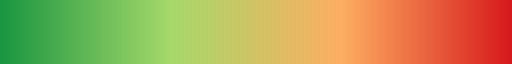

In [5]:
cmap2

In [6]:
palette2.mpl_colors

[(0.10196078431372549, 0.5882352941176471, 0.2549019607843137),
 (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 (0.9921568627450981, 0.6823529411764706, 0.3803921568627451),
 (0.8431372549019608, 0.09803921568627451, 0.10980392156862745)]

In [7]:
from matplotlib.colors import LinearSegmentedColormap

In [8]:
colors = [(0.10196078431372549, 0.5882352941176471, 0.2549019607843137),
 (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 (0.9921568627450981, 0.6823529411764706, 0.3803921568627451),
 (0.8431372549019608, 0.09803921568627451, 0.10980392156862745)]

# colors = [(0.10196078431372549, 0.5882352941176471, 0.2549019607843137),
#  (0.8431372549019608, 0.09803921568627451, 0.10980392156862745)]

In [9]:
cm = LinearSegmentedColormap.from_list('RdYlGn_r_test', colors, N=100)

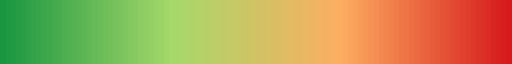

In [10]:
cm

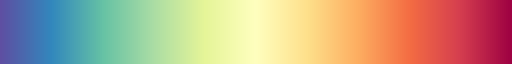

In [11]:
palette3 = palettable.colorbrewer.diverging.Spectral_11_r
palette3.mpl_colormap

In [12]:
palette3.mpl_colors

[(0.3686274509803922, 0.30980392156862746, 0.6352941176470588),
 (0.19607843137254902, 0.5333333333333333, 0.7411764705882353),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.6705882352941176, 0.8666666666666667, 0.6431372549019608),
 (0.9019607843137255, 0.9607843137254902, 0.596078431372549),
 (1.0, 1.0, 0.7490196078431373),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.9921568627450981, 0.6823529411764706, 0.3803921568627451),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.8352941176470589, 0.24313725490196078, 0.30980392156862746),
 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473)]

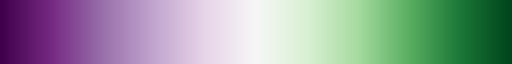

In [13]:
palette4 = palettable.colorbrewer.diverging.PRGn_11
palette4.mpl_colormap

In [14]:
palette4.mpl_colors

[(0.25098039215686274, 0.0, 0.29411764705882354),
 (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
 (0.6, 0.4392156862745098, 0.6705882352941176),
 (0.7607843137254902, 0.6470588235294118, 0.8117647058823529),
 (0.9058823529411765, 0.8313725490196079, 0.9098039215686274),
 (0.9686274509803922, 0.9686274509803922, 0.9686274509803922),
 (0.8509803921568627, 0.9411764705882353, 0.8274509803921568),
 (0.6509803921568628, 0.8588235294117647, 0.6274509803921569),
 (0.35294117647058826, 0.6823529411764706, 0.3803921568627451),
 (0.10588235294117647, 0.47058823529411764, 0.21568627450980393),
 (0.0, 0.26666666666666666, 0.10588235294117647)]

In [15]:
# colors = [(0.3686274509803922, 0.30980392156862746, 0.6352941176470588),
#  (0.19607843137254902, 0.5333333333333333, 0.7411764705882353),
#  (0.4, 0.7607843137254902, 0.6470588235294118),
#  (0.6705882352941176, 0.8666666666666667, 0.6431372549019608),
#  (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
#  (0.10196078431372549, 0.5882352941176471, 0.2549019607843137)]

colors = [
    # (0.25098039215686274, 0.0, 0.29411764705882354), 
    (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
    (0.3686274509803922, 0.30980392156862746, 0.6352941176470588), 
    (0.19607843137254902, 0.5333333333333333, 0.7411764705882353), 
    (0.4, 0.7607843137254902, 0.6470588235294118),
 # (0.6705882352941176, 0.8666666666666667, 0.6431372549019608),
 # (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 # (0.10196078431372549, 0.5882352941176471, 0.2549019607843137), 
         ]

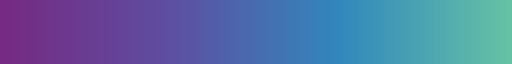

In [16]:
BlGn = LinearSegmentedColormap.from_list('BlGn', colors, N=100)
BlGn

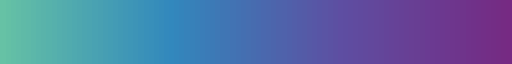

In [17]:
BlGn_r = LinearSegmentedColormap.from_list('BlGn_r', list(reversed(colors)), N=100)
BlGn_r

# Reading Cl exchange Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [18]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
home_dir = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory'
sub_dir = '/data_processing/20220329_XPD_Oceanview'
subfolder = glob.glob(home_dir + sub_dir + '/20220330_CsPb_66mMBr_10min**')
subfolder.sort()
# # del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min_08uL_Cl
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min_16uL_Cl
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min_32uL_Cl
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20220329_XPD_Oceanview/20220330_CsPb_66mMBr_10min_64uL_Cl


In [19]:
# dilute_list = [os.path.basename(i) for i in subfolder]
# dilute_list
# # np.float32(re.findall(r'\d+', dilute_list[0]))

In [20]:
# dilute_ratio = []
# for i in range(len(dilute_list)):
#     rates = np.float32(re.findall(r'\d+', dilute_list[i]))
#     # c = rates[:2].sum() / rates.sum()
#     c = 1/rates[-1]
#     dilute_ratio.append(c)
# dilute_ratio

In [21]:
# dilute_factor = np.asarray([1.0, 1.0, 1.5, 2.0, 2.0, 2.5, 3.0, 3.5, 4.0])
# dilute_ratio = 1/dilute_factor

In [22]:
# dilute_ratio

In [23]:
sample_list = ['Br', 'Cl_08uL', 'Cl_16uL', 'Cl_32uL', 'Cl_64uL']

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [24]:
df_Cl = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# integration_time = ['300ms']

for i in range(len(subfolder)):
# for i in range(len(sample_list)):
    data_files = glob.glob(subfolder[i] + f'/**.txt')
    data_files.sort()
    # del data_files[-1]
    # suffix = os.path.basename(subfolder_PL[i])
    suffix = sample_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):        
        df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
        df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        # df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
        # df_temp = pd.concat([df_temp, df_int['Fluorescence']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df_Cl[f'x_{suffix}'] = df_int['Wavelength']
    df_Cl[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

In [25]:
i

4

## Export PL of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [26]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df.to_csv('20230829_CsPbBr_PL.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [27]:
df_Cl

,x_Br,Br_mean,x_Cl_08uL,Cl_08uL_mean,x_Cl_16uL,Cl_16uL_mean,x_Cl_32uL,Cl_32uL_mean,x_Cl_64uL,Cl_64uL_mean
0,196.263,-0.5855,196.263,-0.3315,196.263,-0.6500,196.263,-0.3385,196.263,-0.5795
1,197.066,0.1590,197.066,0.0115,197.066,-0.1120,197.066,-0.1695,197.066,-0.0295
2,197.870,1.1330,197.870,0.8055,197.870,0.8760,197.870,0.9435,197.870,1.0465
3,198.673,-0.8050,198.673,-0.7320,198.673,-0.7565,198.673,-0.9590,198.673,-0.8290
4,199.476,1.8475,199.476,7.7175,199.476,16.5620,199.476,8.5980,199.476,3.9025
...,...,...,...,...,...,...,...,...,...,...
1039,989.419,2.4515,989.419,1.9685,989.419,2.2435,989.419,1.3225,989.419,1.2580
1040,990.139,0.2645,990.139,0.4865,990.139,0.3565,990.139,0.3545,990.139,0.3590
1041,990.860,-0.7660,990.860,-0.6825,990.860,-0.5300,990.860,-0.7265,990.860,-0.2975
1042,991.581,0.7770,991.581,0.7940,991.581,0.9760,991.581,0.8930,991.581,0.6840


## Check data in pd dataframe

In [28]:
df_Cl.keys()

Index(['x_Br', 'Br_mean', 'x_Cl_08uL', 'Cl_08uL_mean', 'x_Cl_16uL',
       'Cl_16uL_mean', 'x_Cl_32uL', 'Cl_32uL_mean', 'x_Cl_64uL',
       'Cl_64uL_mean'],
      dtype='object')

In [29]:
df_Cl.shape

(1044, 10)

## Prepare keys for average scans in pd dataframe

In [30]:
keys_list = list(df_Cl.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_Br',
 'Br_mean',
 'x_Cl_08uL',
 'Cl_08uL_mean',
 'x_Cl_16uL',
 'Cl_16uL_mean',
 'x_Cl_32uL',
 'Cl_32uL_mean',
 'x_Cl_64uL',
 'Cl_64uL_mean']

In [31]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Br_mean
Cl_08uL_mean
Cl_16uL_mean
Cl_32uL_mean
Cl_64uL_mean


## Plot all PL scans together

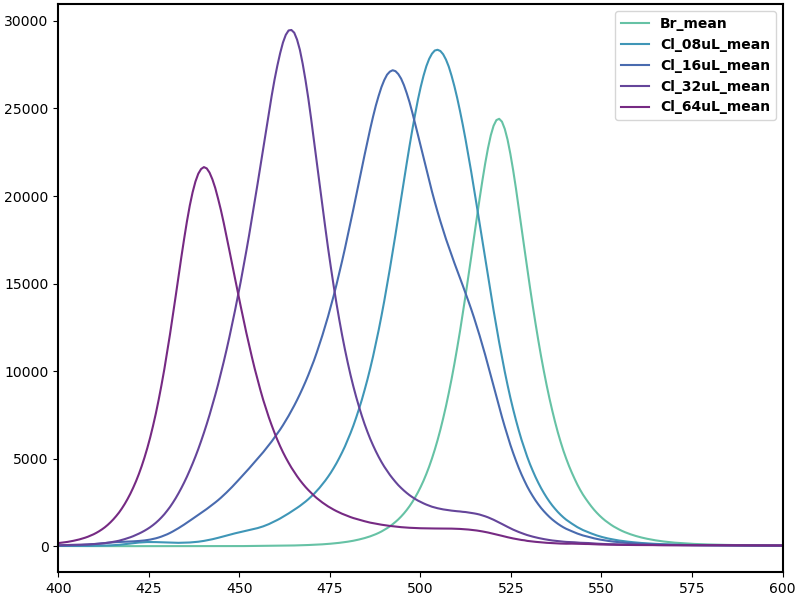

In [32]:
f1, ax1 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 30

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    # t = re.findall(r'\d+', title[i])[-1]
    ax1.plot(df_Cl[keys_list[i*2]], df_Cl[keys_list[i*2+1]], color=BlGn_r(color_idx[i]), label=label[i][:id1])
        
legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)
# ax1[1].legend(prop=legend_properties)

ax1.set_xlim(400, 600)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df_Cl[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df_Cl[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)